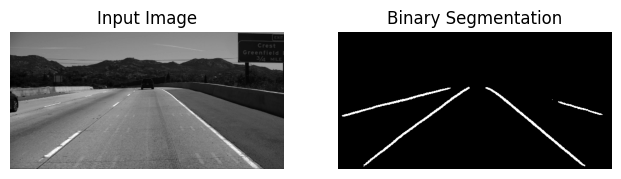

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from lane_detector import ENet

# Load the pre-trained model
model_path = 'M:\MODEL_32_EPOCHS\enet_new_model.pth' # Replace with the path to your trained model
enet_model = ENet(2, 4)  # Assuming you used the same model architecture

# Load the trained model's weights
enet_model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
enet_model.eval()  # Set the model to evaluation mode

# Define a function to process and visualize the output
def process_and_visualize(input_image_path):
    # Load and preprocess the input image
    input_image = cv2.imread(input_image_path)
    input_image = cv2.resize(input_image, (512, 256))  # Resize to the model's input size
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    input_image = input_image[..., None]
    input_tensor = torch.from_numpy(input_image).float().permute(2, 0, 1)  # Convert to tensor

    # Pass the input image through the model
    with torch.no_grad():
        binary_logits, instance_logits = enet_model(input_tensor.unsqueeze(0))

    # Post-process the model's output
    binary_seg = torch.argmax(binary_logits, dim=1).squeeze().numpy()
    instance_seg = torch.argmax(instance_logits, dim=1).squeeze().numpy()

    # Visualize the results
    plt.figure(figsize=(12, 6))

    # Plot the input image
    plt.subplot(1, 3, 1)
    plt.imshow(input_image.squeeze(), cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    # Plot the binary segmentation
    plt.subplot(1, 3, 2)
    plt.imshow(binary_seg, cmap='gray')
    plt.title('Binary Segmentation')
    plt.axis('off')


# Replace 'input_image.jpg' with the path to your test image
input_image_path = '18.jpg'
process_and_visualize(input_image_path)


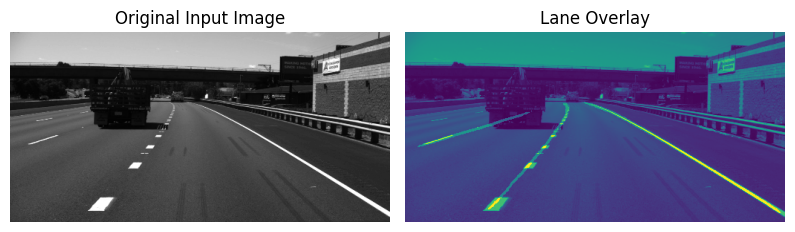

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from lane_detector import ENet
# Load the pre-trained model
model_path = 'F:\8Model Train\Kaggle_ENet\enet_new_model_2.pth'  # Replace with the path to your trained model
enet_model = ENet(2, 4)  # Assuming you used the same model architecture

# Load the trained model's weights
enet_model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
enet_model.eval()  # Set the model to evaluation mode

# Define a function to process and visualize the output
def process_and_visualize(input_image_path):
    # Load and preprocess the input image
    input_image = cv2.imread(input_image_path)
    input_image = cv2.resize(input_image, (512, 256))  # Resize to the model's input size
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    input_image = input_image[..., None]
    input_tensor = torch.from_numpy(input_image).float().permute(2, 0, 1)  # Convert to tensor

    # Pass the input image through the model
    with torch.no_grad():
        binary_logits, instance_logits = enet_model(input_tensor.unsqueeze(0))

    # Post-process the model's output
    binary_seg = torch.argmax(binary_logits, dim=1).squeeze().numpy()
    instance_seg = torch.argmax(instance_logits, dim=1).squeeze().numpy()

    # Convert the binary segmentation mask to grayscale
    binary_seg_grayscale = np.zeros_like(input_image)
    binary_seg_grayscale[binary_seg == 1] = 255  # White color for lanes

    # Overlay the binary segmentation mask on the input image
    output_image = input_image.copy()
    output_image = cv2.addWeighted(output_image, 0.7, binary_seg_grayscale, 0.3, gamma=0)

    # Visualize the results
    plt.figure(figsize=(12, 6))

    
    plt.subplot(1,3,1)
    plt.imshow(input_image, cmap='gray')  # Use grayscale colormap for consistent appearance
    plt.title('Original Input Image')
    plt.axis('off')
    
    # Plot the input image and lane-detected image side by side
    plt.subplot(1,3,2)
    plt.imshow(output_image)  # Use grayscale colormap for consistent appearance
    plt.title('Lane Overlay')
    plt.axis('off')


    plt.tight_layout()
    plt.show()

# Replace 'input_image.jpg' with the path to your test image
input_image_path = 'E:/TuSimple/test_set/clips/0530/1492626047222176976_0/15.jpg'
process_and_visualize(input_image_path)
